
# Regularized Linear Kramers Kronig Demonstration file using function mode
#
* Documentation:
  
 Based on frequency vector 'f' and complex-valued impedance spectrum measurement data 'Z'
 rLKK reconstruct the "ideal" or "fixed" measurement "Zf"

 * Goal:

 (1) if Z and Zf's deviation are small: The measurement data's consistency is
 validated

 There is a rule of thumb of 1% or 2% for this

 (2) It's possible to use the reconstructed data as "correction" to noise
 and 'white' distortions (i.e., distortions averaging at 0)
 This should be done with caution

In [12]:
import numpy as np
from scipy.io import loadmat
from rLKK import rLKK


# Script Mode
import matplotlib.pyplot as plt

# load impedance spectrum, as "Z" and "f"
data = loadmat('Zimp.mat')
Z = data['Z'].reshape(-1)
f = data['f'].ravel()

# Using default data (RECOMMENDED)
Zf = rLKK(Z, f)

# Using specific lambda and DRT frequency, aggressive rLKK
lambda_ = 1e10
fx = np.logspace(-20, 20, 1000)
Zf1 = rLKK(Z, f, lambda_, fx)


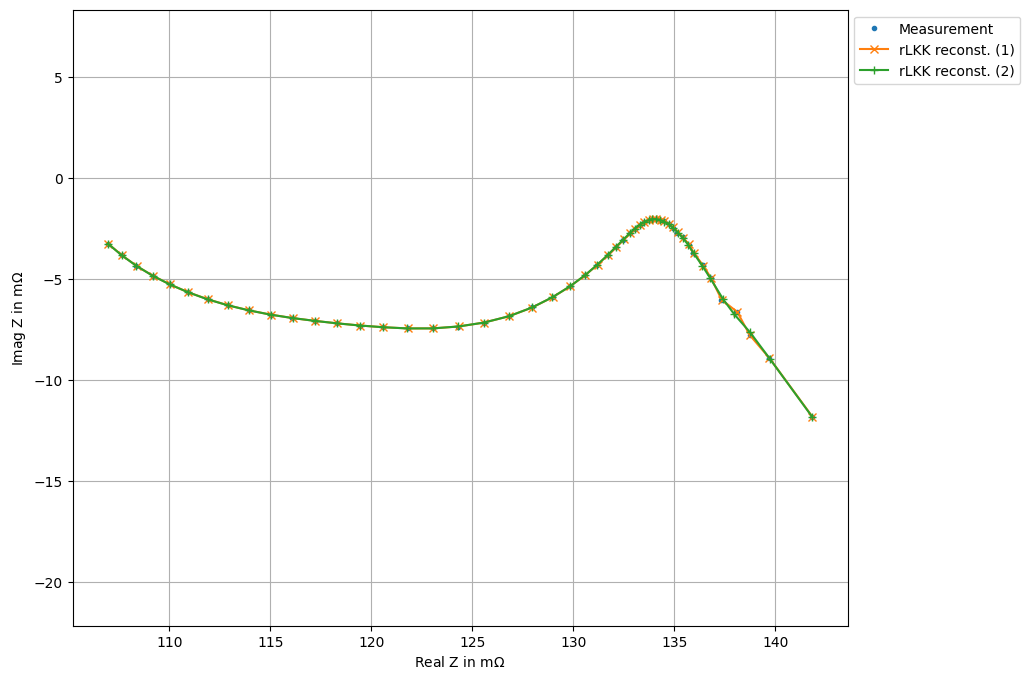

In [13]:

plt.figure(figsize=(10, 8))
plt.plot(Z.real * 1e3, Z.imag * 1e3, '.', label='Measurement')
plt.plot(Zf.real * 1e3, Zf.imag * 1e3, 'x-', label='rLKK reconst. (1)')
plt.plot(Zf1.real * 1e3, Zf1.imag * 1e3, '+-', label='rLKK reconst. (2)')
plt.xlabel('Real Z in m$\Omega$')
plt.ylabel('Imag Z in m$\Omega$')
plt.axis('equal')
plt.box(True)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


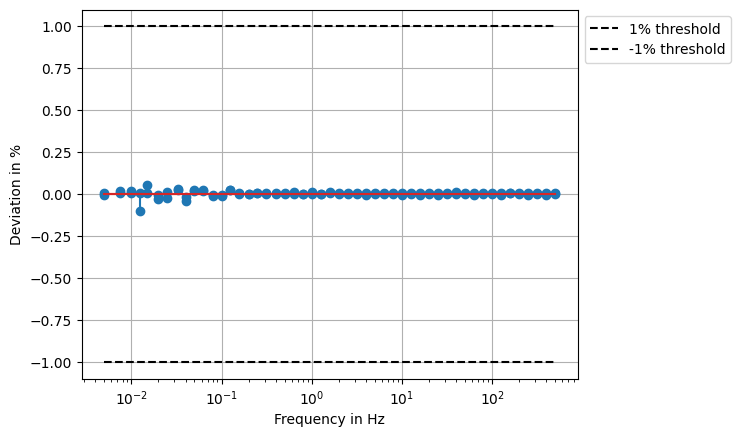

In [14]:

Zres = (np.abs(Zf) - np.abs(Z)) / np.abs(Zf) * 100
Zres1 = (np.abs(Zf1) - np.abs(Z)) / np.abs(Zf1) * 100
plt.stem(f, Zres)
plt.stem(f, Zres1)
plt.xscale('log')
plt.grid(True)
plt.box(True)
plt.plot(f, np.ones_like(f) * 1, 'k--', label='1% threshold')
plt.plot(f, np.ones_like(f) * -1, 'k--', label='-1% threshold')
plt.xlabel('Frequency in Hz')
plt.ylabel('Deviation in %')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [15]:

# Further help (Script mode)
#
# * Script mode Use:
#
# * Load Z (complex impedance specturm) and f
# if you have real and imaginary, construct Z using Z = re + 1j*im
# if you have amp and phase, construct Z using Z = amp*np.exp(1j*phase)
# phase is in radians, if not then phase = phase / 180 * np.pi
#
# * The DRT frequency (fx)
# Configure rLKK_do to match your measurement
# fx should include the measurement frequency and be broader
#
# include infinity frequency in your calculation to avoid
# "series-resistance" effect by adding "Inf" in fx
#
# * Regularization parameter (lambda)
# larger lambda = data are less reliable due to noise and distortions
# Typical values: 10^-1 to 10^-2 (1e-2 - 1e-1) for EIS of batteries

# Meta info
# Author: Ahmed Yahia Kallel, Measurement and Sensor Technology, Chemnitz
# Univeristy of Technology
#
# version-rLKK: version 5 (First public release)
#
# version-portal: version 1 (First public release)
#
# Citation:
#
# [Kallel2021] Kallel, Ahmed Yahia, and Olfa Kanoun. "Regularized linear kramers-kronig transform for consistency check of noisy impedance spectra with logarithmic frequency distribution." 2021 International Workshop on Impedance Spectroscopy (IWIS). IEEE, 2021.